### ⭐️ Ordinary Least Squares ⭐️

In [218]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 3], [2, -1]], [0, 1, 6])

reg.coef_, reg.intercept_

(array([ 2.71428571, -0.57142857]), 1.7763568394002505e-15)

In [219]:
reg_rid = linear_model.Ridge(alpha=.5)
# reg_rid.fit([[0, 0], [0, 0], [1, 1]], [0, .1, 1])
reg_rid.fit([[0, 0], [1, 3], [2, -1]], [0, 1, 6])

reg_rid.coef_, reg_rid.intercept_

(array([ 2.15969582, -0.60076046]), 0.5741444866920151)

In [220]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [221]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# diabetes_X[0], diabetes_y[0]
# diabetes = datasets.load_diabetes()
# diabetes['data'], diabetes['target'] 

In [222]:
np.shape(diabetes_X)

(442, 10)

In [223]:
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [224]:
np.shape(diabetes_X)

(442, 1)

In [225]:
# len(diabetes_X)

In [226]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

In [227]:
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

In [228]:
regr = linear_model.LinearRegression()

In [229]:
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [230]:
diabetes_y_pred = regr.predict(diabetes_X_test)

In [231]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


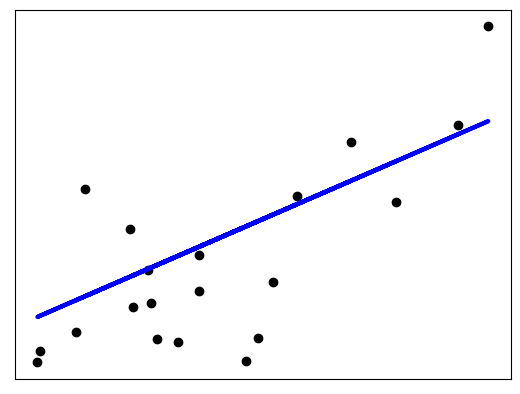

In [232]:
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

#### Non-Negative

In [233]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


In [234]:
# Generate some random data
np.random.seed(12)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)
true_coef = 5 * np.random.randn(n_features)

# Threshold coefficients to render them non-negative
true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)

# Add some noise
y += 8 * np.random.normal(size=(n_samples,))
# X, y

In [235]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

In [236]:
# Fit the Non-Negative least squares
from sklearn.linear_model import LinearRegression

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
"NNLS R2 score", r2_score_nnls


('NNLS R2 score', 0.8844768177652086)

In [237]:
# Fit an OLS
reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
"OLS R2 score", r2_score_ols

('OLS R2 score', 0.8848015661015897)

Text(0, 0.5, 'NNLS regression coefficients')

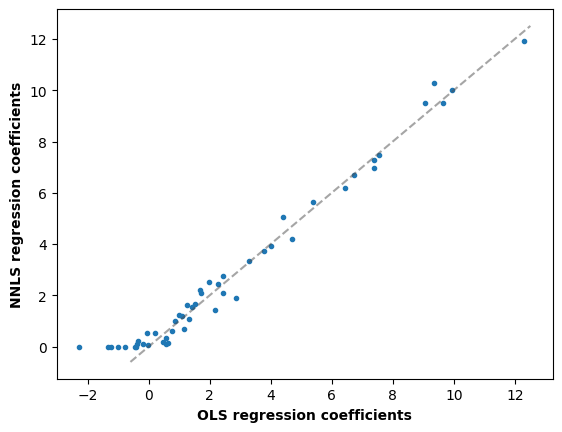

In [238]:
fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker=".")

low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
ax.set_xlabel("OLS regression coefficients", fontweight="bold")
ax.set_ylabel("NNLS regression coefficients", fontweight="bold")
